Notebook for assessing stop/start and dfco impacts

In [7]:
import sys
if '../src' not in sys.path:
    sys.path.append('../src')
import os
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import importlib
# import seaborn as sns
# sns.set(font_scale=2, style='whitegrid')

%matplotlib inline

In [12]:
# local modules
import SimDrive
importlib.reload(SimDrive)

<module 'SimDrive' from '../src\\SimDrive.py'>

In [13]:
import LoadData
importlib.reload(LoadData)

<module 'LoadData' from '../src\\LoadData.py'>

In [22]:
t0 = time.time()
cyc = cycle.Cycle("udds")
cyc_jit = cyc.get_numba_cyc()
print(time.time() - t0)

0.0029654502868652344


In [52]:
t0 = time.time()
veh0 = vehicle.Vehicle(1).get_numba_veh()
print(time.time() - t0)

0.011967658996582031


In [53]:
t0 = time.time()
veh1 = vehicle.Vehicle(28).get_numba_veh()
print(time.time() - t0)

0.011995792388916016


In [104]:
t0 = time.time()
sim_drive0 = simdrive.SimDriveJit(len(cyc.cycSecs))
sim_drive0.sim_drive(cyc_jit, veh0, -1)
print(time.time() - t0)
sim_drive1 = simdrive.SimDriveJit(len(cyc.cycSecs))
sim_drive1.sim_drive(cyc_jit, veh1, -1)
print(time.time() - t0)

0.0009970664978027344
0.005983829498291016


(0, 35)

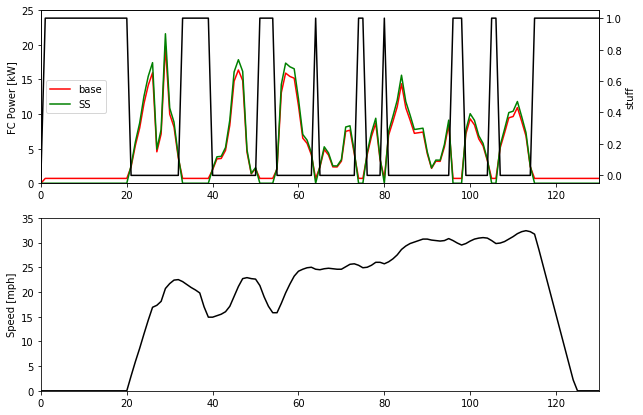

In [165]:
plt.figure(figsize=(10, 7))
ax0 = plt.subplot(211)
ax0.plot(cyc.cycSecs, sim_drive0.fcKwOutAch, label='base', color='red')
ax0.plot(cyc.cycSecs, sim_drive1.fcKwOutAch, label='SS', color='green')
# ax.plot(cyc.cycSecs, dfco_fcKwOutAchPos, label='dfco', linestyle='--', color='blue')
ax0.legend(loc='center left')
ax0.set_ylabel('FC Power [kW]')
ax0.set_ylim([0, 25])
ax0.set_xlim([0, 130])

ax1 = ax0.twinx()
ax1.plot(cyc.cycSecs, sim_drive1.canPowerAllElectrically, color='black')
ax1.set_ylabel('stuff')
ax1.set_xlim(ax0.get_xlim())
# ax1.set_ylim([0.52, 0.526])

ax2 = plt.subplot(212)
ax2.plot(cyc.cycSecs, cyc.cycMph, color='black')
ax2.set_ylabel('Speed [mph]')
ax2.set_xlim(ax0.get_xlim())
ax2.set_ylim([0, 35])

(0, 130)

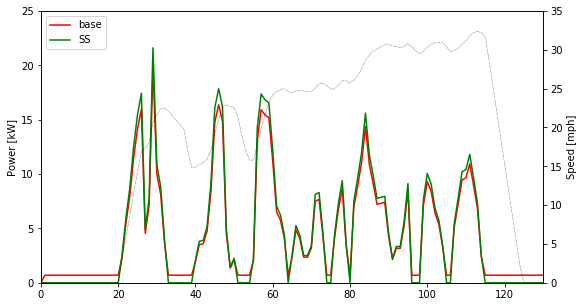

In [110]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(cyc.cycSecs, sim_drive0.fcKwOutAch, label='base', color='red')
ax.plot(cyc.cycSecs, sim_drive1.fcKwOutAch, label='SS', color='green')
# ax.plot(cyc.cycSecs, dfco_fcKwOutAchPos, label='dfco', linestyle='--', color='blue')
ax.legend(loc='upper left')
ax.set_ylabel('Power [kW]')
ax.set_ylim([0, 25])

ax2 = ax.twinx()
ax2.plot(cyc.cycSecs, cyc.cycMph, linestyle=':', linewidth=0.5, color='black')
ax2.set_ylabel('Speed [mph]')
ax2.set_ylim([0, 35])

plt.xlabel('Time [s]')

plt.xlim([0, 130])

(0, 130)

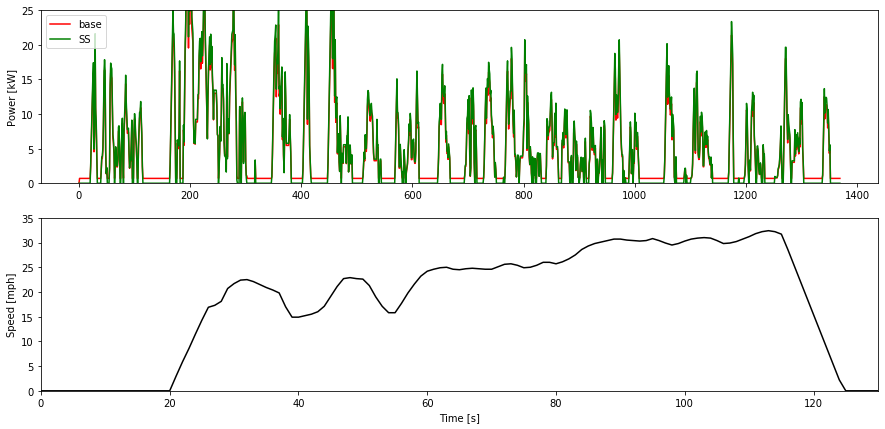

In [109]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(cyc.cycSecs, sim_drive0.fcKwOutAch, label='base', color='red')
plt.plot(cyc.cycSecs, sim_drive1.fcKwOutAch, label='SS', color='green')
# ax.plot(cyc.cycSecs, dfco_fcKwOutAchPos, label='dfco', linestyle='--', color='blue')
plt.legend(loc='upper left')
plt.ylabel('Power [kW]')
plt.ylim([0, 25])

plt.subplot(212)
# ax2 = ax.twinx()
plt.plot(cyc.cycSecs, cyc.cycMph, color='black')
plt.ylabel('Speed [mph]')
plt.ylim([0, 35])

plt.xlabel('Time [s]')

plt.xlim([0, 130])